Тема “Обучение без учителя”

Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [9]:
import warnings
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.


In [2]:
boston = load_boston()

Создайте датафреймы X и y из этих данных.

In [3]:
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

Масштабируйте данные с помощью StandardScaler.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)



Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.


In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=100)
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

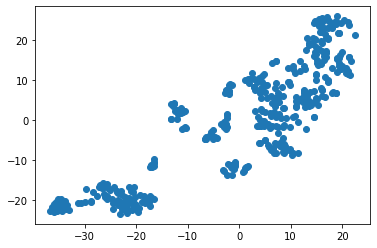

In [10]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42.

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)


Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


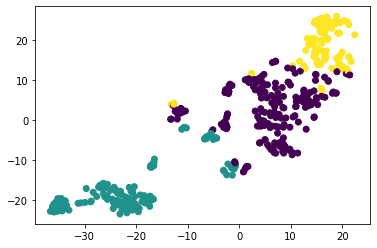

In [12]:
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [51]:
price_1 = 0
price_2 = 0
price_3 = 0
price_1_c = 0
price_2_c = 0
price_3_c = 0
crim_1 = 0
crim_2 = 0
crim_3 = 0
crim_1_c = 0
crim_2_c = 0
crim_3_c = 0
for i,val in enumerate(labels_train[:]):
  if (val == 0) :
    price_1 += y_train.iloc[i]['price']
    price_1_c += 1
    crim_1 += X_train.iloc[i]['CRIM']
  elif (val == 1) :    
    price_2 += y_train.iloc[i]['price']
    price_2_c += 1
    crim_2 += X_train.iloc[i]['CRIM']
  elif (val == 2) : 
    price_3 += y_train.iloc[i]['price']
    price_3_c += 1
    crim_3 += X_train.iloc[i]['CRIM']


print(f'Средняя цена в 1 кластере = {price_1/price_1_c}')
print(f'Средняя цена в 2 кластере = {price_2/price_2_c}')
print(f'Средняя цена в 3 кластере = {price_3/price_3_c}')  
print(f'Средний уровень преступности 1 кластере = {crim_1/price_1_c}')
print(f'Средний уровень преступности 2 кластере = {crim_2/price_2_c}')
print(f'Средний уровень преступности 3 кластере = {crim_3/price_3_c}')  

Средняя цена в 1 кластере = 24.958115183246072
Средняя цена в 2 кластере = 16.165354330708666
Средняя цена в 3 кластере = 27.788372093023252
Средний уровень преступности 1 кластере = 0.42166020942408367
Средний уровень преступности 2 кластере = 10.797028425196853
Средний уровень преступности 3 кластере = 0.07356558139534886


*Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.


In [49]:
labels_test = kmeans.predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [50]:
price_1 = 0
price_2 = 0
price_3 = 0
price_1_c = 0
price_2_c = 0
price_3_c = 0
crim_1 = 0
crim_2 = 0
crim_3 = 0
crim_1_c = 0
crim_2_c = 0
crim_3_c = 0
for i,val in enumerate(labels_test[:]):
  if (val == 0) :
    price_1 += y_test.iloc[i]['price']
    price_1_c += 1
    crim_1 += X_test.iloc[i]['CRIM']
  elif (val == 1) :    
    price_2 += y_test.iloc[i]['price']
    price_2_c += 1
    crim_2 += X_test.iloc[i]['CRIM']
  elif (val == 2) : 
    price_3 += y_test.iloc[i]['price']
    price_3_c += 1
    crim_3 += X_test.iloc[i]['CRIM']


print(f'Средняя цена в 1 кластере = {price_1/price_1_c}')
print(f'Средняя цена в 2 кластере = {price_2/price_2_c}')
print(f'Средняя цена в 3 кластере = {price_3/price_3_c}')  
print(f'Средний уровень преступности 1 кластере = {crim_1/price_1_c}')
print(f'Средний уровень преступности 2 кластере = {crim_2/price_2_c}')
print(f'Средний уровень преступности 3 кластере = {crim_3/price_3_c}')  

Средняя цена в 1 кластере = 21.860784313725492
Средняя цена в 2 кластере = 16.437142857142856
Средняя цена в 3 кластере = 31.35
Средний уровень преступности 1 кластере = 0.26607882352941176
Средний уровень преступности 2 кластере = 10.165531142857143
Средний уровень преступности 3 кластере = 0.062060000000000004
